In [1]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=097aa04c1ebaa883d46ab8abd0e310382047c72b0843f79d9750049153a17602
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [3]:
df = pd.read_csv("sample_pandas_6.csv")

In [4]:
category_df = pd.read_csv('category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [5]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


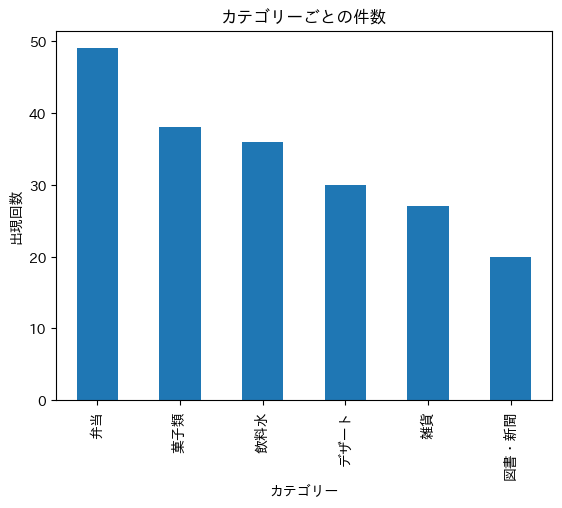

In [6]:
# 「カテゴリー」列の値の出現回数を棒グラフで表示
df['カテゴリー'].value_counts().plot(kind='bar')

plt.xlabel('カテゴリー')
plt.ylabel('出現回数')
plt.title('カテゴリーごとの件数')
plt.show()

In [10]:
# ① groupby + agg：sum, mean
agg_result = df.groupby('商品番号')[['単価', '在庫', '注文数']].agg(['sum', 'mean'])

# ② groupby + describe：単価・在庫・注文数すべてに対して
desc_unit = df.groupby('商品番号')['単価'].describe()
desc_stock = df.groupby('商品番号')['在庫'].describe()
desc_order = df.groupby('商品番号')['注文数'].describe()

# 列名をわかりやすくするためにプレフィックスを追加
desc_unit.columns = [f'単価_{col}' for col in desc_unit.columns]
desc_stock.columns = [f'在庫_{col}' for col in desc_stock.columns]
desc_order.columns = [f'注文数_{col}' for col in desc_order.columns]

# ③ すべてを横方向に連結
combined = pd.concat([agg_result, desc_unit, desc_stock, desc_order], axis=1)

# 表示
combined

,"(単価, sum)","(単価, mean)","(在庫, sum)","(在庫, mean)","(注文数, sum)","(注文数, mean)",単価_count,単価_mean,単価_std,単価_min,...,在庫_75%,在庫_max,注文数_count,注文数_mean,注文数_std,注文数_min,注文数_25%,注文数_50%,注文数_75%,注文数_max
商品番号,,,,,,,,,,,,,,,,,,,,,
1QJFO8QY,19200,600.0,890,27.812500,1128,35.250000,32.0,600.0,0.0,600.0,...,40.00,50.0,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,6000,300.0,535,26.750000,588,29.400000,20.0,300.0,0.0,300.0,...,40.00,50.0,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,3300,330.0,270,27.000000,216,21.600000,10.0,330.0,0.0,330.0,...,42.50,50.0,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,2520,120.0,660,31.428571,528,25.142857,21.0,120.0,0.0,120.0,...,45.00,50.0,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,11220,660.0,395,23.235294,744,43.764706,17.0,660.0,0.0,660.0,...,40.00,45.0,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,11340,420.0,725,26.851852,894,33.111111,27.0,420.0,0.0,420.0,...,45.00,50.0,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,14400,720.0,430,21.500000,666,33.300000,20.0,720.0,0.0,720.0,...,25.00,50.0,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,1260,90.0,360,25.714286,306,21.857143,14.0,90.0,0.0,90.0,...,30.00,45.0,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,13260,780.0,425,25.000000,540,31.764706,17.0,780.0,0.0,780.0,...,40.00,50.0,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0
